### **Project:** House Price Prediction with Machine Learning

### **Problem Statement**

The goal of this data science project is to use the house price dataset to construct a regression machine-learning system for forecasting the cost of homes.

### **Task**

To implement a machine learning model capable of predicting the best future house sale prices.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Dropout

import joblib

In [3]:
# Read in the housing data and view first few observations
house_data = pd.read_csv('/content/drive/MyDrive/house_data.csv')
house_data.head()

id             date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000 221900.000         3      1.000         1180   
1  6414100192  20141209T000000 538000.000         3      2.250         2570   
2  5631500400  20150225T000000 180000.000         2      1.000          770   
3  2487200875  20141209T000000 604000.000         4      3.000         1960   
4  1954400510  20150218T000000 510000.000         3      2.000         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650   1.000           0     0          3      7        1180   
1      7242   2.000           0     0          3      7        2170   
2     10000   1.000           0     0          3      6         770   
3      5000   1.000           0     0          5      7        1050   
4      8080   1.000           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode    lat     long  \
0              0      1955             0    98178 47.511 -122.257   
1            400      1951          1991    98125 47.721 -122.319   
2              0      1933             0    98028 47.738 -122.233   
3            910      1965             0    98136 47.521 -122.393   
4              0      1987             0    98074 47.617 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [4]:
# Get the Necessary information
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
not_used = ['id', 'date']

In [7]:
#  Number of Unique observations for each feature
house_data.nunique()

id               21436
date               372
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [8]:
# Copy data for a neater analysis
df = house_data.copy()
df = df.drop(not_used, axis=1)



In [9]:
# Selecting the target and the feature variables
y = df['price']
X = df.drop('price', axis=1)

In [10]:
# Model Training and Evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=0)
rf_reg = RandomForestRegressor(random_state=0, max_depth=9)

xg_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)



RandomForestRegressor(max_depth=9, random_state=0)

In [11]:
# Five random predictions
test_length = len(y_test)
random_indexes = list(np.random.choice(test_length, size=5, replace=False))

xg_pred = xg_reg.predict(X_test)
rf_pred = rf_reg.predict(X_test)

print(random_indexes)
rand_test = y_test.to_numpy()[random_indexes]
rand_xg = xg_pred[random_indexes]
rand_rf = rf_pred[random_indexes]

pred_table = pd.DataFrame({'rand_test': rand_test,
              'rand_xg': rand_xg,
              'rand_rf': rand_rf})

[3840, 1870, 2925, 1560, 4010]


In [12]:
MAE_xg = mean_absolute_error(y_test, xg_pred)
MAE_rf = mean_absolute_error(y_test, rf_pred)

RMSE_xg = np.sqrt(mean_squared_error(y_test, xg_pred))
RMSE_rf = np.sqrt(mean_squared_error(y_test, rf_pred))

pd.DataFrame({'MAE': [MAE_xg, MAE_rf],
 'RMSE': [RMSE_xg, RMSE_rf]},
 index = ['xg_boost', 'random_forest'])

MAE       RMSE
xg_boost      74982.971 125022.897
random_forest 74428.799 124178.112

In [13]:
model = Sequential(
    [
        Dense(64, activation="relu", input_shape=(X_train.shape[1],), name="layer1"),
        Dropout(0.3),
        Dense(64, activation="relu", name="layer2"),
        Dropout(0.3),
        Dense(64, activation="relu", name="layer3"),
        Dropout(0.3),
        Dense(1, name="layer4"),
    ]
)

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 64)                1216      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 layer2 (Dense)              (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 layer3 (Dense)              (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 layer4 (Dense)              (None, 1)                 6

In [14]:
model.fit(X_train, y_train)

nn_pred = (model.predict(X_test)).reshape((len(y_test),))

rand_nn = nn_pred[random_indexes]
pd.DataFrame({'rand_test': rand_test,
              'rand_xg': rand_xg,
              'rand_rf': rand_rf,
              'rand_nn': rand_nn})

# nn_pred[:5]

136/136 [==============================] - 0s 1ms/step


rand_test     rand_xg     rand_rf    rand_nn
0  439000.000  446357.719  419089.174 439064.094
1  413500.000  398531.062  384585.641 443988.219
2 1720000.000 1996102.625 2110140.130 560887.688
3  254000.000  238169.500  239533.574 461278.281
4  335000.000  329257.188  329266.159 551113.688

In [15]:
MAE_nn = mean_absolute_error(y_test, nn_pred)

RMSE_nn = np.sqrt(mean_squared_error(y_test, nn_pred))

pd.DataFrame({'MAE': [MAE_xg, MAE_rf, MAE_nn],
 'RMSE': [RMSE_xg, RMSE_rf, RMSE_nn]},
 index = ['xg_boost', 'random_forest', 'neural_network'])

MAE       RMSE
xg_boost        74982.971 125022.897
random_forest   74428.799 124178.112
neural_network 205520.285 326897.968

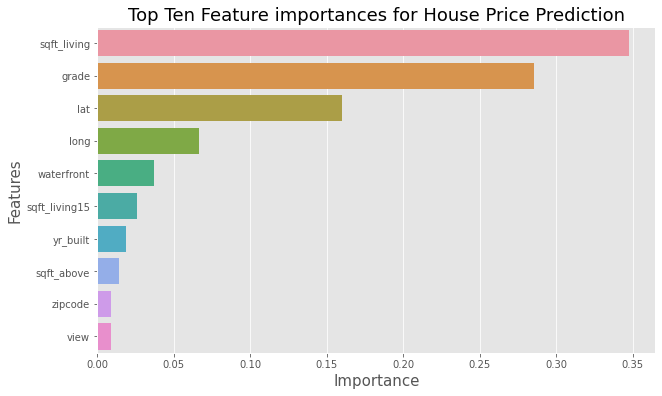

In [31]:
# The Random Forest Regressor was the best model, 
# We would get the feature immportances and retrain with fewer features
#  to have an easier interface and lower feature space to work with

feat_imp = rf_reg.feature_importances_

cols = X_train.columns



imp_table = pd.DataFrame({'features': cols, 
                          'importance':feat_imp})
imp_table = imp_table.sort_values('importance', ascending=False)
imp_table_10 = imp_table[:10]

plt.figure(figsize=(10, 6))
sns.barplot(y='features', x='importance', data=imp_table_10, ci=None, orient='h')
plt.title('Top Ten Feature importances for House Price Prediction', fontsize=18)
plt.xlabel('Importance', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.show()

# imp_table_10

**The most important features seen in the data set include**;
 
- the sqft_living (demonstrates the size of the house)
- grade (demonstrates the quality of the house)
- latitude and longitude (gives insight to the location of the house)

In [35]:
## Training and Evaluating the model with the top ten features...............
top_ten_features = list(imp_table_10.features.values)
top_ten_features

X_train_10, X_test_10 = X_train[top_ten_features], X_test[top_ten_features]

rf_reg_10 = RandomForestRegressor(random_state=0, max_depth=9)

rf_reg_10.fit(X_train_10, y_train)
rf_pred_10 = rf_reg_10.predict(X_test_10)

MAE_rf_10 = mean_absolute_error(y_test, rf_pred_10)
RMSE_rf_10 = np.sqrt(mean_squared_error(y_test, rf_pred_10))
print(f'MAE for top ten feats: {MAE_rf_10}')
print(f'RMSE for top ten feats: {RMSE_rf_10}')

MAE for top ten feats: 74906.33714998858
RMSE for top ten feats: 124011.27669550317


In [36]:
# save the Best Performing model with least overhead (i.e rf_reg_10) to disk
filename = 'finalized_model.sav'
joblib.dump(rf_reg_10, filename)
 
# some time later...
 
# load the model from disk
# loaded_model = joblib.load(filename)

['finalized_model.sav']

***NOTE***: More extensive analysis would have been carried out, but because of time constraint I have built a simple but effective proof of concept for this project.
The extensive analysis excluded include:
- Exploratory Data Analysis especially on the independent variables
- Feature engineering such as one-hot encoding e.t.c

These also led to the poor performance of the neural network model on the dataset.